In [68]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.readwrite import json_graph

In [2]:
filename = 'DBpedia_com_tech-G.json'

with open(filename) as f:
    DBpedia = json.load(f) # DBpedia is a dictionary

In [3]:
DBpedia.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])

In [4]:
DBpedia['nodes'][0]

{'id': 0,
 'label': [0],
 'content': ['CHE100156447'],
 'train': True,
 'test': False}

In [5]:
type(DBpedia['nodes'][0])

dict

In [6]:
# trasform nodes in a dataframe
df_node = pd.DataFrame(DBpedia['nodes'])
df_node.content = df_node.content.map(lambda x: x[0])
df_node.head()

,id,label,content,train,test
0,0,[0],CHE100156447,True,False
1,1,[0],CHE101526742,True,False
2,2,[0],CHE103328957,True,False
3,3,[0],CHE107104641,True,False
4,4,[0],CHE107677925,True,False


In [7]:
# df_node = df_node[:10000]

In [8]:
num_nodes = len(df_node)
print(f"Number of nodes: {num_nodes}")

Number of nodes: 10000


Number of values for each argument:

In [9]:
MyList = df_node.content.values

In [10]:
from collections import Counter

nodes_content = df_node.content.values
nodes_content_count = dict(Counter(nodes_content))
df_node['num_occurances_content'] = df_node.groupby('content')['id'].transform(pd.Series.value_counts)

In [11]:
df_node.head()

,id,label,content,train,test,num_occurances_content
0,0,[0],CHE100156447,True,False,1
1,1,[0],CHE101526742,True,False,1
2,2,[0],CHE103328957,True,False,1
3,3,[0],CHE107104641,True,False,1
4,4,[0],CHE107677925,True,False,1


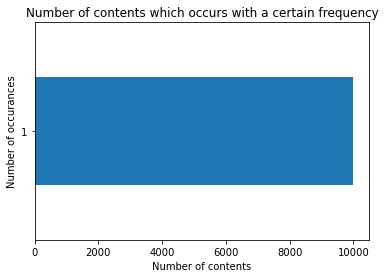

In [12]:
df_node['num_occurances_content'].value_counts().plot(kind='barh')
plt.title("Number of contents which occurs with a certain frequency")
plt.ylabel("Number of occurances")
plt.xlabel("Number of contents")
plt.show()

Create the Graph directly from the JSON file:

In [16]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [18]:
G = read_json_file(filename)

In [24]:
nodes = G.nodes()
edges = G.edges()

In [26]:
num_nodes = len(nodes)
num_nodes

878062

In [39]:
G_degrees = dict(G.degree())

**Average Degree**

The average degree of an undirected graph is the sum of the degrees of all its nodes divided by the number of nodes in the graph. It is a measure of the connectedness of a graph.

In [41]:
average_degree = sum(G_degrees.values())/num_nodes
average_degree

11.280752384227993

**Node's total degree**

get the degree of a certain node:

In [46]:
G_degrees[54567]

12

In [45]:
G_degrees[1000]

7

**Degree distribution**

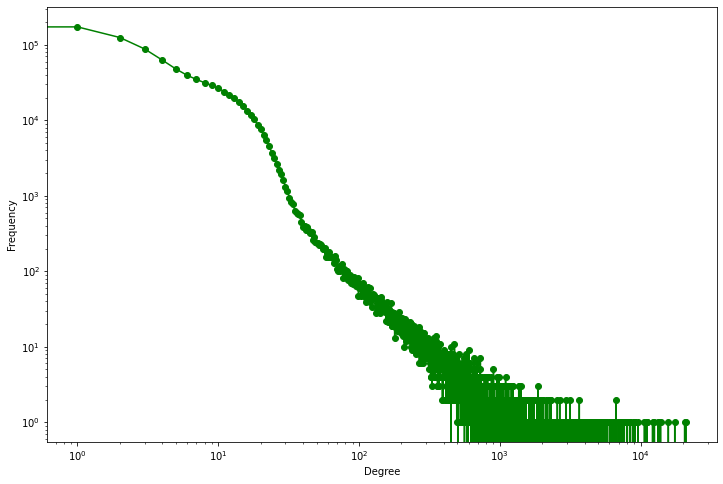

In [60]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

**Degree Variance**



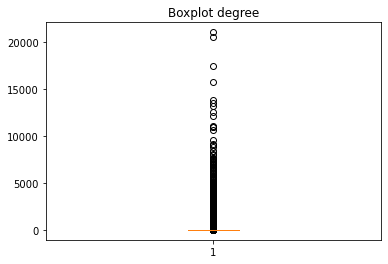

In [65]:
# boxplot

fig1, ax1 = plt.subplots()
ax1.boxplot(G_degrees.values())
plt.title("Boxplot degree")
plt.show()

In [66]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [82]:
data = {G_degrees.values()}
m=2

data[abs(data - np.mean(data)) < m * np.std(data)]

TypeError: unsupported operand type(s) for /: 'set' and 'int'

In [76]:
G_degrees_no_outliers = reject_outliers(list(G_degrees.values()), m=2)


fig2, ax2 = plt.subplots()
ax2.boxplot(G_degrees_no_outliers)
plt.title("Boxplot degree without outliers")
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
nx.draw(G)

In [11]:
DBpedia['links']

13998,
  'test_removed': False,
  'train_removed': False},
 {'source': 140,
  'target': 244815,
  'test_removed': False,
  'train_removed': False},
 {'source': 140,
  'target': 205302,
  'test_removed': False,
  'train_removed': False},
 {'source': 140,
  'target': 219998,
  'test_removed': False,
  'train_removed': False},
 {'source': 141,
  'target': 213402,
  'test_removed': False,
  'train_removed': False},
 {'source': 142,
  'target': 245953,
  'test_removed': False,
  'train_removed': False},
 {'source': 142,
  'target': 204713,
  'test_removed': False,
  'train_removed': False},
 {'source': 142,
  'target': 221322,
  'test_removed': False,
  'train_removed': False},
 {'source': 142,
  'target': 214076,
  'test_removed': False,
  'train_removed': False},
 {'source': 142,
  'target': 177057,
  'test_removed': False,
  'train_removed': False},
 {'source': 143,
  'target': 190993,
  'test_removed': False,
  'train_removed': False},
 {'source': 143,
  'target': 209709,
  'test_remove

In [13]:
'annotations' in DBpedia

False

In [14]:
'indeed' in DBpedia

False